#CartPole - Environment

<ipython-input-27-94b84ed047d4>:56: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.smooth_l1_loss(q_values[:, action], torch.tensor(target))  # Convert target to tensor


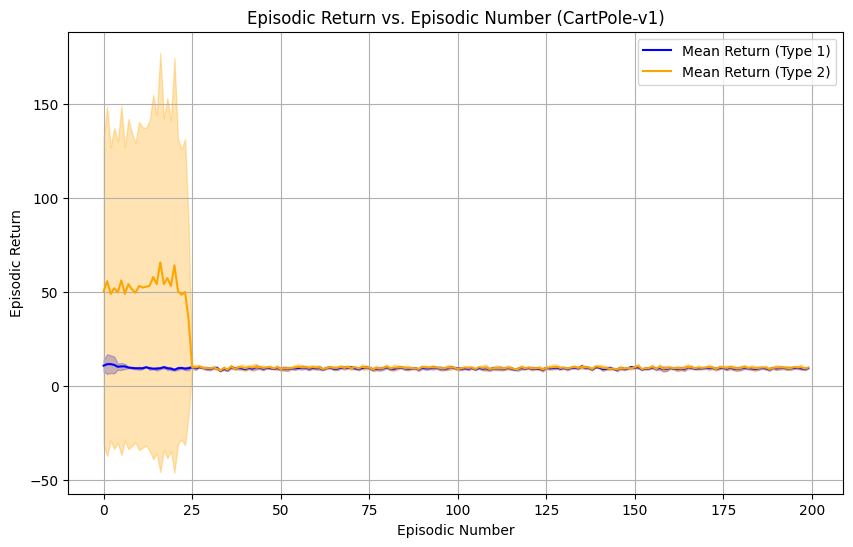

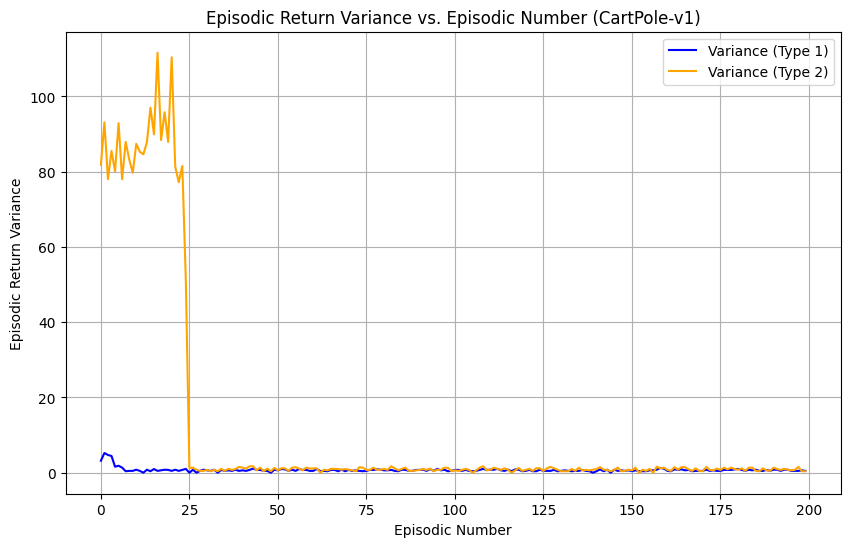

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import gym

# Dueling DQN model
class DuelingDQN(nn.Module):
    def __init__(self, input_dim, output_dim, equation_type):
        super(DuelingDQN, self).__init__()
        self.equation_type = equation_type

        self.fc1_value = nn.Linear(input_dim, 64)
        self.fc2_value = nn.Linear(64, 1)

        self.fc1_advantage = nn.Linear(input_dim, 64)
        self.fc2_advantage = nn.Linear(64, output_dim)

    def forward(self, x):
        value_stream = F.relu(self.fc1_value(x))
        value = self.fc2_value(value_stream)

        advantage_stream = F.relu(self.fc1_advantage(x))
        advantage = self.fc2_advantage(advantage_stream)

        if self.equation_type == 1:
            q_values = value + (advantage - torch.mean(advantage, dim=1, keepdim=True))
        elif self.equation_type == 2:
            q_values = value + (advantage - torch.max(advantage, dim=1, keepdim=True)[0])
        else:
            raise ValueError("Invalid equation type. Choose between 1 and 2.")

        return q_values

# Function to run an episode
def run_episode(env, model, optimizer, gamma):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)  # Convert state to tensor
        q_values = model(state_tensor)
        action = torch.argmax(q_values, dim=1).item()

        next_state, reward, done, _ = env.step(action)

        with torch.no_grad():
            next_state_tensor = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)  # Convert next state to tensor
            next_q_values = model(next_state_tensor)
            next_max_q_value = torch.max(next_q_values).item()
            target = reward + gamma * next_max_q_value * (1 - done)

        loss = F.smooth_l1_loss(q_values[:, action], torch.tensor(target))  # Convert target to tensor

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_reward += reward
        state = next_state

    return total_reward

# Function to train the model
def train_model(env_name, num_episodes, gamma, seeds, equation_type):
    env = gym.make(env_name)
    input_dim = env.observation_space.shape[0]
    output_dim = env.action_space.n
    episode_returns = np.zeros((len(seeds), num_episodes))

    for seed_idx, seed in enumerate(seeds):
        env.seed(seed)
        torch.manual_seed(seed)
        model = DuelingDQN(input_dim, output_dim, equation_type)
        optimizer = optim.Adam(model.parameters(), lr=1e-3)

        for episode in range(num_episodes):
            episode_returns[seed_idx, episode] = run_episode(env, model, optimizer, gamma)

    return episode_returns

# Function to plot results for both types
def plot_results(episode_returns_type1, episode_returns_type2, env_name):
    mean_returns_type1 = np.mean(episode_returns_type1, axis=0)
    std_returns_type1 = np.std(episode_returns_type1, axis=0)

    mean_returns_type2 = np.mean(episode_returns_type2, axis=0)
    std_returns_type2 = np.std(episode_returns_type2, axis=0)

    plt.figure(figsize=(10, 6))

    # Plot Type 1 results
    plt.plot(mean_returns_type1, label='Mean Return (Type 1)', color='blue')
    plt.fill_between(np.arange(len(mean_returns_type1)), mean_returns_type1 - std_returns_type1, mean_returns_type1 + std_returns_type1, alpha=0.3, color='blue')

    # Plot Type 2 results
    plt.plot(mean_returns_type2, label='Mean Return (Type 2)', color='orange')
    plt.fill_between(np.arange(len(mean_returns_type2)), mean_returns_type2 - std_returns_type2, mean_returns_type2 + std_returns_type2, alpha=0.3, color='orange')

    plt.title(f'Episodic Return vs. Episodic Number ({env_name})')
    plt.xlabel('Episodic Number')
    plt.ylabel('Episodic Return')
    plt.legend()
    plt.grid(True)

    plt.figure(figsize=(10, 6))

    # Plot variance for Type 1
    plt.plot(std_returns_type1, label='Variance (Type 1)', color='blue')

    # Plot variance for Type 2
    plt.plot(std_returns_type2, label='Variance (Type 2)', color='orange')

    plt.title(f'Episodic Return Variance vs. Episodic Number ({env_name})')
    plt.xlabel('Episodic Number')
    plt.ylabel('Episodic Return Variance')
    plt.legend()
    plt.grid(True)

    plt.show()

# Main function
def main():
    env_name = 'CartPole-v1'
    num_episodes = 200
    gamma = 0.99
    seeds = [10, 20, 30, 40, 50]  # 5 random seeds

    episode_returns_type1 = train_model(env_name, num_episodes, gamma, seeds, equation_type=1)
    episode_returns_type2 = train_model(env_name, num_episodes, gamma, seeds, equation_type=2)

    plot_results(episode_returns_type1, episode_returns_type2, env_name)

if __name__ == "__main__":
    main()


# Acrobat- Environment

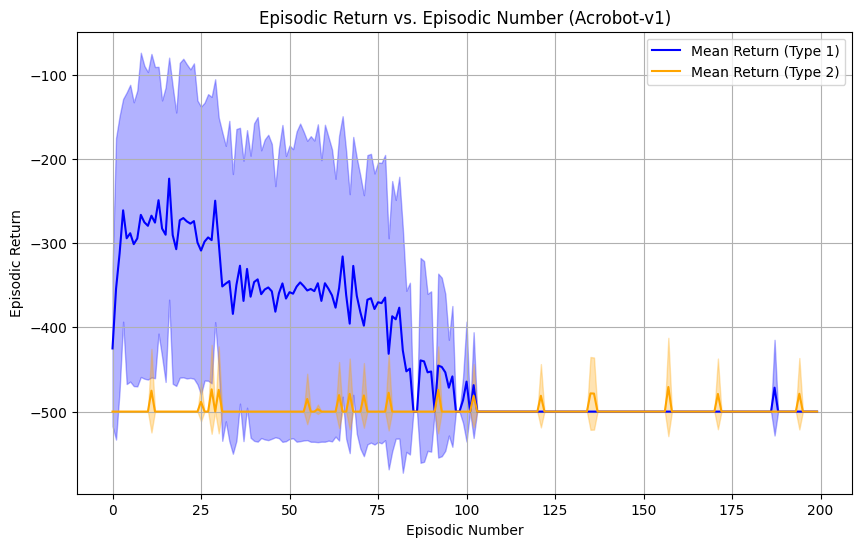

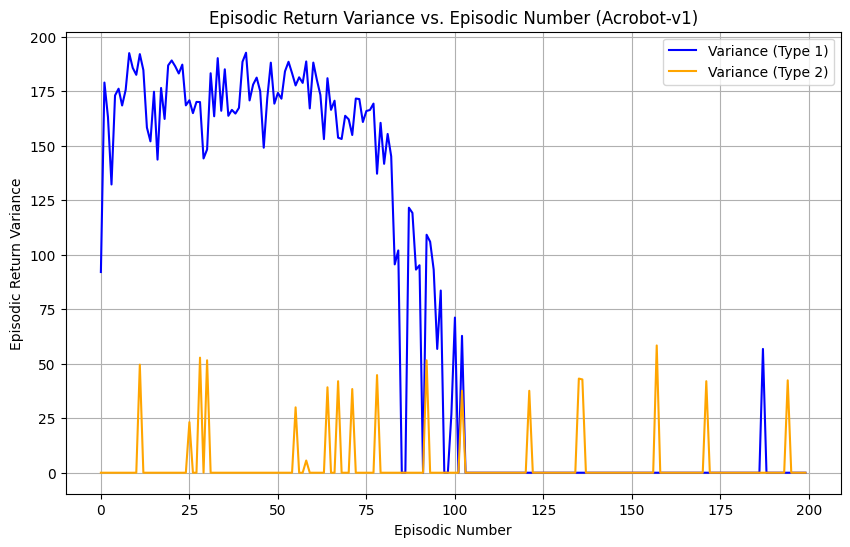

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import gym

# Dueling DQN model
class DuelingDQN(nn.Module):
    def __init__(self, input_dim, output_dim, equation_type):
        super(DuelingDQN, self).__init__()
        self.equation_type = equation_type

        self.fc1_value = nn.Linear(input_dim, 64)
        self.fc2_value = nn.Linear(64, 1)

        self.fc1_advantage = nn.Linear(input_dim, 64)
        self.fc2_advantage = nn.Linear(64, output_dim)

    def forward(self, x):
        value_stream = F.relu(self.fc1_value(x))
        value = self.fc2_value(value_stream)

        advantage_stream = F.relu(self.fc1_advantage(x))
        advantage = self.fc2_advantage(advantage_stream)

        if self.equation_type == 1:
            q_values = value + (advantage - torch.mean(advantage, dim=1, keepdim=True))
        elif self.equation_type == 2:
            q_values = value + (advantage - torch.max(advantage, dim=1, keepdim=True)[0])
        else:
            raise ValueError("Invalid equation type. Choose between 1 and 2.")

        return q_values

# Function to run an episode
def run_episode(env, model, optimizer, gamma):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)  # Convert state to tensor
        q_values = model(state_tensor)
        action = torch.argmax(q_values, dim=1).item()

        next_state, reward, done, _ = env.step(action)

        with torch.no_grad():
            next_state_tensor = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)  # Convert next state to tensor
            next_q_values = model(next_state_tensor)
            next_max_q_value = torch.max(next_q_values).item()
            target = reward + gamma * next_max_q_value * (1 - done)

        loss = F.smooth_l1_loss(q_values[:, action], torch.tensor([target]))  # Convert target to tensor with the same shape

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_reward += reward
        state = next_state

    return total_reward

# Function to train the model
def train_model(env_name, num_episodes, gamma, seeds, equation_type):
    env = gym.make(env_name)
    input_dim = env.observation_space.shape[0]
    output_dim = env.action_space.n
    episode_returns = np.zeros((len(seeds), num_episodes))

    for seed_idx, seed in enumerate(seeds):
        env.seed(seed)
        torch.manual_seed(seed)
        model = DuelingDQN(input_dim, output_dim, equation_type)
        optimizer = optim.Adam(model.parameters(), lr=1e-3)

        for episode in range(num_episodes):
            episode_returns[seed_idx, episode] = run_episode(env, model, optimizer, gamma)

    return episode_returns

# Function to plot results for both types
def plot_results(episode_returns_type1, episode_returns_type2, env_name):
    mean_returns_type1 = np.mean(episode_returns_type1, axis=0)
    std_returns_type1 = np.std(episode_returns_type1, axis=0)

    mean_returns_type2 = np.mean(episode_returns_type2, axis=0)
    std_returns_type2 = np.std(episode_returns_type2, axis=0)

    plt.figure(figsize=(10, 6))

    # Plot Type 1 results
    plt.plot(mean_returns_type1, label='Mean Return (Type 1)', color='blue')
    plt.fill_between(np.arange(len(mean_returns_type1)), mean_returns_type1 - std_returns_type1, mean_returns_type1 + std_returns_type1, alpha=0.3, color='blue')

    # Plot Type 2 results
    plt.plot(mean_returns_type2, label='Mean Return (Type 2)', color='orange')
    plt.fill_between(np.arange(len(mean_returns_type2)), mean_returns_type2 - std_returns_type2, mean_returns_type2 + std_returns_type2, alpha=0.3, color='orange')

    plt.title(f'Episodic Return vs. Episodic Number ({env_name})')
    plt.xlabel('Episodic Number')
    plt.ylabel('Episodic Return')
    plt.legend()
    plt.grid(True)

    plt.figure(figsize=(10, 6))

    # Plot variance for Type 1
    plt.plot(std_returns_type1, label='Variance (Type 1)', color='blue')

    # Plot variance for Type 2
    plt.plot(std_returns_type2, label='Variance (Type 2)', color='orange')

    plt.title(f'Episodic Return Variance vs. Episodic Number ({env_name})')
    plt.xlabel('Episodic Number')
    plt.ylabel('Episodic Return Variance')
    plt.legend()
    plt.grid(True)

    plt.show()

# Main function
def main():
    env_name = 'Acrobot-v1'
    num_episodes = 200
    gamma = 0.99
    seeds = [10, 20, 30, 40, 50]  # 5 random seeds

    episode_returns_type1 = train_model(env_name, num_episodes, gamma, seeds, equation_type=1)
    episode_returns_type2 = train_model(env_name, num_episodes, gamma, seeds, equation_type=2)

    plot_results(episode_returns_type1, episode_returns_type2, env_name)

if __name__ == "__main__":
    main()

# COMPARISON BETWEEN TWO ENVIRONMENTS FOR DUELING

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


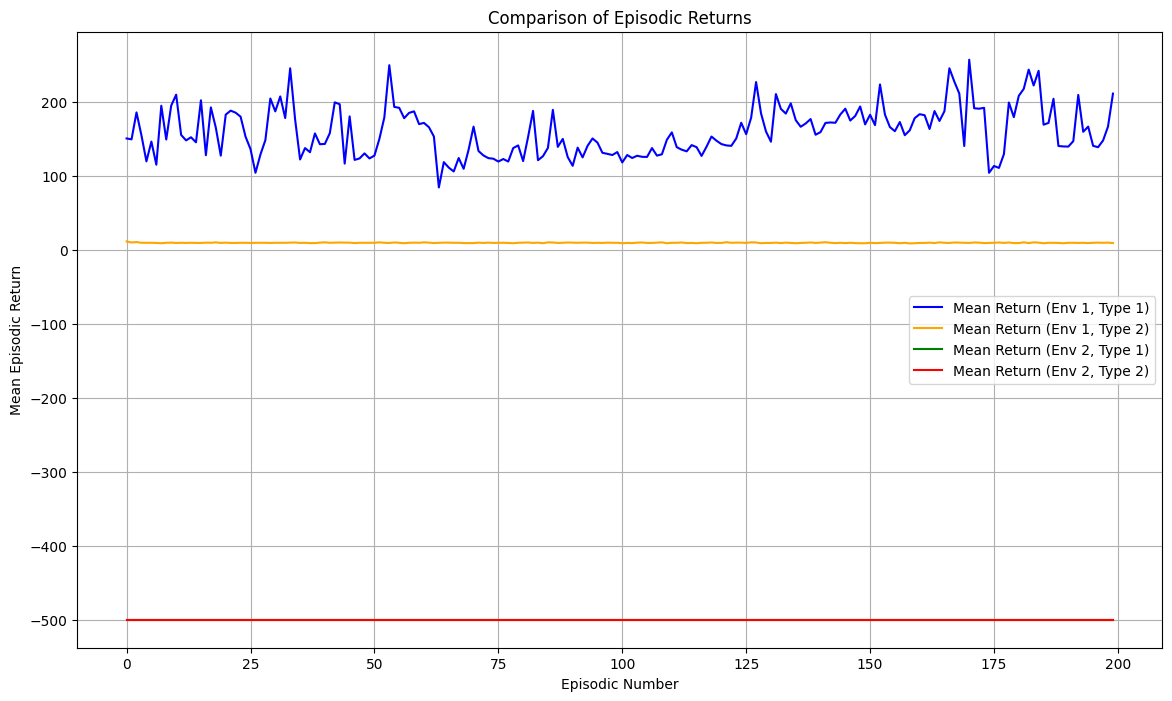

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import gym

# Dueling DQN model
class DuelingDQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DuelingDQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc_value = nn.Linear(128, 1)
        self.fc_advantage = nn.Linear(128, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        value = self.fc_value(x)
        advantage = self.fc_advantage(x)
        return value + advantage - advantage.mean(dim=-1, keepdim=True)

# Function to generate an episode
def generate_episode(env, policy, device):
    states = []
    actions = []
    rewards = []
    state = env.reset()

    done = False
    while not done:
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)
        action_values = policy(state_tensor)
        action = torch.argmax(action_values, dim=1).item()
        next_state, reward, done, _ = env.step(action)

        states.append(state)
        actions.append(action)
        rewards.append(reward)

        state = next_state

    return states, actions, rewards

# Function to calculate returns
def calculate_returns(rewards, gamma):
    returns = []
    G = 0

    for r in reversed(rewards):
        G = r + gamma * G
        returns.insert(0, G)

    return returns

# Function to train the policy
def train_policy(env_name, num_episodes, gamma, seeds, equation_type, device):
    env = gym.make(env_name)
    input_dim = env.observation_space.shape[0]
    output_dim = env.action_space.n
    policy = DuelingDQN(input_dim, output_dim).to(device)
    optimizer = optim.Adam(policy.parameters(), lr=1e-3)

    episode_returns = np.zeros((len(seeds), num_episodes))

    for seed_idx, seed in enumerate(seeds):
        env.seed(seed)
        torch.manual_seed(seed)

        for episode in range(num_episodes):
            states, actions, rewards = generate_episode(env, policy, device)
            returns = calculate_returns(rewards, gamma)

            for t in range(len(states)):
                state_tensor = torch.tensor(states[t], dtype=torch.float32).unsqueeze(0).to(device)
                action_values = policy(state_tensor)
                advantage = returns[t] - action_values[0][actions[t]]
                loss = (advantage ** 2).mean()

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            episode_returns[seed_idx, episode] = sum(rewards)

    return episode_returns

# Function to plot comparison results
def plot_comparison_results(episode_returns_env1_type1, episode_returns_env1_type2, episode_returns_env2_type1, episode_returns_env2_type2):
    plt.figure(figsize=(14, 8))

    # Plot mean returns for Environment 1, Type 1
    plt.plot(np.mean(episode_returns_env1_type1, axis=0), label='Mean Return (Env 1, Type 1)', color='blue')

    # Plot mean returns for Environment 1, Type 2
    plt.plot(np.mean(episode_returns_env1_type2, axis=0), label='Mean Return (Env 1, Type 2)', color='orange')

    # Plot mean returns for Environment 2, Type 1
    plt.plot(np.mean(episode_returns_env2_type1, axis=0), label='Mean Return (Env 2, Type 1)', color='green')

    # Plot mean returns for Environment 2, Type 2
    plt.plot(np.mean(episode_returns_env2_type2, axis=0), label='Mean Return (Env 2, Type 2)', color='red')

    plt.title('Comparison of Episodic Returns')
    plt.xlabel('Episodic Number')
    plt.ylabel('Mean Episodic Return')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function
def main():
    env_name1 = 'CartPole-v1'
    env_name2 = 'Acrobot-v1'
    num_episodes = 200
    gamma = 0.99
    seeds = [10, 20, 30, 40, 50]  # 5 random seeds
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    episode_returns_env1_type1 = train_policy(env_name1, num_episodes, gamma, seeds, equation_type=1, device=device)
    episode_returns_env1_type2 = train_policy(env_name1, num_episodes, gamma, seeds, equation_type=2, device=device)
    episode_returns_env2_type1 = train_policy(env_name2, num_episodes, gamma, seeds, equation_type=1, device=device)
    episode_returns_env2_type2 = train_policy(env_name2, num_episodes, gamma, seeds, equation_type=2, device=device)

    plot_comparison_results(episode_returns_env1_type1, episode_returns_env1_type2, episode_returns_env2_type1, episode_returns_env2_type2)

if __name__ == "__main__":
    main()


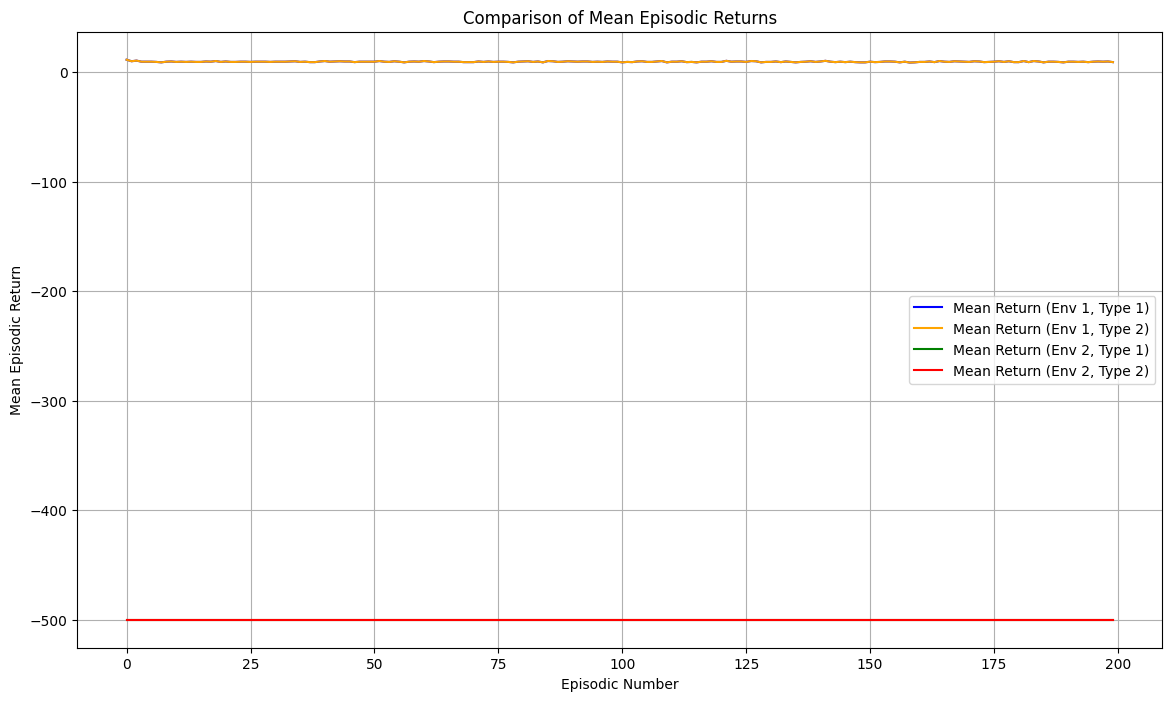

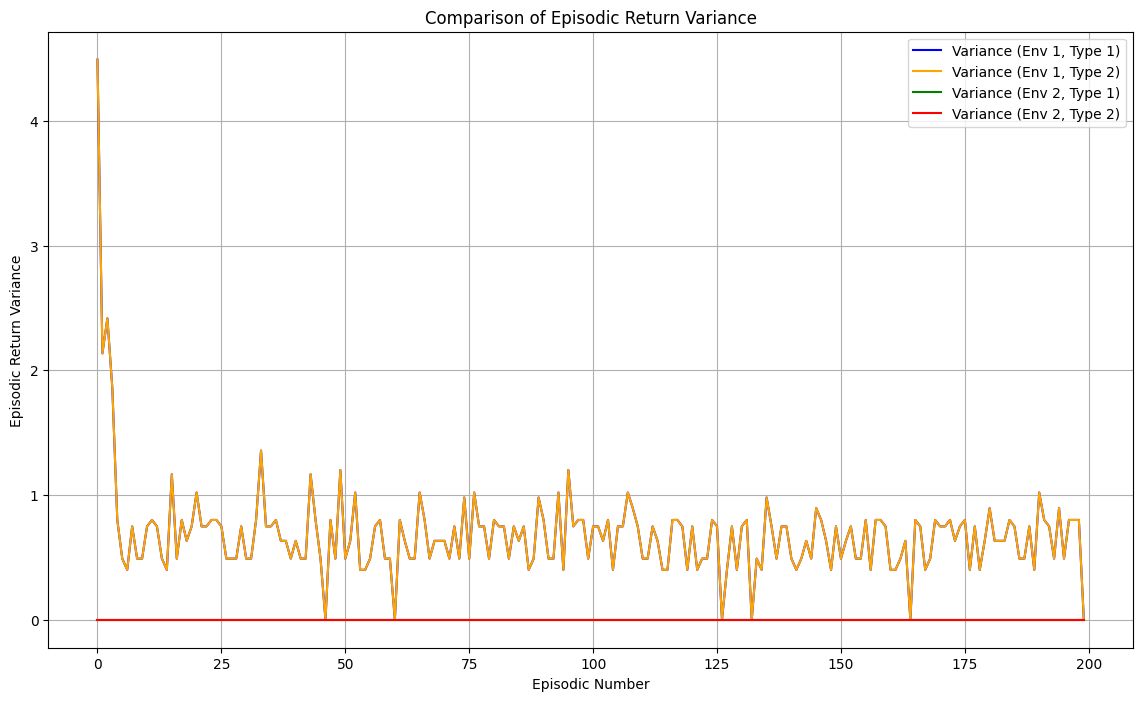

In [6]:
# Function to plot comparison results for mean returns
def plot_mean_returns_comparison(episode_returns_env1_type1, episode_returns_env1_type2, episode_returns_env2_type1, episode_returns_env2_type2):
    plt.figure(figsize=(14, 8))

    # Plot mean returns for Environment 1, Type 1
    mean_returns_env1_type1 = np.mean(episode_returns_env1_type1, axis=0)
    plt.plot(mean_returns_env1_type1, label='Mean Return (Env 1, Type 1)', color='blue')

    # Plot mean returns for Environment 1, Type 2
    mean_returns_env1_type2 = np.mean(episode_returns_env1_type2, axis=0)
    plt.plot(mean_returns_env1_type2, label='Mean Return (Env 1, Type 2)', color='orange')

    # Plot mean returns for Environment 2, Type 1
    mean_returns_env2_type1 = np.mean(episode_returns_env2_type1, axis=0)
    plt.plot(mean_returns_env2_type1, label='Mean Return (Env 2, Type 1)', color='green')

    # Plot mean returns for Environment 2, Type 2
    mean_returns_env2_type2 = np.mean(episode_returns_env2_type2, axis=0)
    plt.plot(mean_returns_env2_type2, label='Mean Return (Env 2, Type 2)', color='red')

    plt.title('Comparison of Mean Episodic Returns')
    plt.xlabel('Episodic Number')
    plt.ylabel('Mean Episodic Return')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot comparison results for variance
def plot_variance_comparison(episode_returns_env1_type1, episode_returns_env1_type2, episode_returns_env2_type1, episode_returns_env2_type2):
    plt.figure(figsize=(14, 8))

    # Plot variance for Environment 1, Type 1
    std_returns_env1_type1 = np.std(episode_returns_env1_type1, axis=0)
    plt.plot(std_returns_env1_type1, label='Variance (Env 1, Type 1)', color='blue')

    # Plot variance for Environment 1, Type 2
    std_returns_env1_type2 = np.std(episode_returns_env1_type2, axis=0)
    plt.plot(std_returns_env1_type2, label='Variance (Env 1, Type 2)', color='orange')

    # Plot variance for Environment 2, Type 1
    std_returns_env2_type1 = np.std(episode_returns_env2_type1, axis=0)
    plt.plot(std_returns_env2_type1, label='Variance (Env 2, Type 1)', color='green')

    # Plot variance for Environment 2, Type 2
    std_returns_env2_type2 = np.std(episode_returns_env2_type2, axis=0)
    plt.plot(std_returns_env2_type2, label='Variance (Env 2, Type 2)', color='red')

    plt.title('Comparison of Episodic Return Variance')
    plt.xlabel('Episodic Number')
    plt.ylabel('Episodic Return Variance')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function
def main():
    env_name1 = 'CartPole-v1'
    env_name2 = 'Acrobot-v1'
    num_episodes = 200
    gamma = 0.99
    seeds = [10, 20, 30, 40, 50]  # 5 random seeds
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    episode_returns_env1_type1 = train_policy(env_name1, num_episodes, gamma, seeds, equation_type=1, device=device)
    episode_returns_env1_type2 = train_policy(env_name1, num_episodes, gamma, seeds, equation_type=2, device=device)
    episode_returns_env2_type1 = train_policy(env_name2, num_episodes, gamma, seeds, equation_type=1, device=device)
    episode_returns_env2_type2 = train_policy(env_name2, num_episodes, gamma, seeds, equation_type=2, device=device)

    plot_mean_returns_comparison(episode_returns_env1_type1, episode_returns_env1_type2, episode_returns_env2_type1, episode_returns_env2_type2)
    plot_variance_comparison(episode_returns_env1_type1, episode_returns_env1_type2, episode_returns_env2_type1, episode_returns_env2_type2)

if __name__ == "__main__":
    main()